# Observations and Insights

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,
                        how = 'outer', on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
print(f"There are {number_of_mice} mice")

There are 249 mice


In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouseid_df = combined_data['Mouse ID'].value_counts()
mouseid_df.head()

g989    13
w575    10
m269    10
t451    10
k403    10
Name: Mouse ID, dtype: int64

In [74]:
duplicate_mouseid_df = combined_data.set_index('Mouse ID')
mouseg989 = duplicate_mouseid_df.loc['g989', :]
mouseg989.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [75]:
# Delete the data for g989
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = duplicate_mouseid_df .drop(index = 'g989')
clean_mice_df = clean_mice_data.reset_index()
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_mice_df["Mouse ID"].value_counts())
print(f"There are {number_of_mice_clean} mice")

There are 248 mice


# Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumorvolume = clean_mice_df ['Tumor Volume (mm3)']

#Mean
mean = np.mean(tumorvolume)
print (f"The mean tumor volume is {mean}")

#Median
median = np.median(tumorvolume)
print (f"The median tumor volume is {median}")

#Variance
variance = np.var(tumorvolume, ddof =0)
print (f"The variance of the tumor volume is {variance}")

#Standard Deviation
standard_dev = np.std(tumorvolume, ddof =0)
print (f"The standard deviation of the tumor volume is {standard_dev}")

#SEM
sem = clean_mice_df["Tumor Volume (mm3)"].sem()
print(f"The SEM value is {sem}")


The mean tumor volume is 50.435293232255326
The median tumor volume is 48.933453655
The variance of the tumor volume is 79.42063964177214
The standard deviation of the tumor volume is 8.911825830982792
The SEM value is 0.2055906218698623


In [94]:
# Place all of the data found into a summary DataFrame
summary_df = pd.DataFrame({"Mean": [mean],
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": standard_dev,
                              "SEM" : sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.42064,8.911826,0.205591


# Bar and Pie Charts

In [130]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
#x_axis = np.arange(len(Mouse ID))
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


In [131]:
# Generate a pie plot showing the distribution of female versus male mice 

In [135]:
#Count number of females and males
count = clean_mice_df['Sex'].value_counts()
count

Male      958
Female    922
Name: Sex, dtype: int64

In [136]:

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightgreen"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x7faaa4791220>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

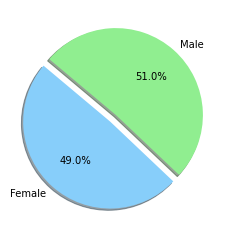

In [137]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)